In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_csv_files(csv_files):
    data_frames = []
    for file in csv_files:
        df = pd.read_csv(file)
        data_frames.append(df)
    return pd.concat(data_frames)

In [3]:
def filter_df(df):
    return df[df['error'] == False]

In [26]:
csv_files_nl = ['data/data_nl.csv']
csv_files_de = ['data/data_de_1.csv','data/data_de_2.csv']
csv_files_fr = ['data/data_fr.csv']
csv_files_gb = ['data/data_gb_1.csv','data/data_gb_2.csv']
csv_files_ie = ['data/data_ie.csv']

df_nl = read_csv_files(csv_files_nl)
df_de = read_csv_files(csv_files_de)
df_fr = read_csv_files(csv_files_fr)
df_gb = read_csv_files(csv_files_gb)
df_ie = read_csv_files(csv_files_ie)

dfs = [df_nl,df_de,df_fr,df_gb,df_ie]
dffs = []

country_labels = ["Netherlands", "Germany", "France", "Great Britain", "Ireland"]

for df in dfs:
    dffs.append(filter_df(df))

In [27]:
# Calculate the counts of accept-found and reject-found
accept_found_total = 0
reject_found_total = 0
sites_total = 0
sites_without_error_total = 0
error_total = 0
for df in dfs:
    filtered_df = df[df['error'] == False]
    sites_without_error_total += (~df['error'].astype(bool)).sum()
    error_total += df['error'].sum()
    accept_found_count = filtered_df['accept-found'].sum()
    reject_found_count = filtered_df['reject-found'].sum()
    accept_found_total += accept_found_count
    reject_found_total += reject_found_count

    # Create a table
    data = {'Accept-Found': [accept_found_count], 'Reject-Found': [reject_found_count]}
    table_df = pd.DataFrame(data)
    #print(table_df)
sites_total = sites_without_error_total + error_total
print(f"Total sites: {sites_total}")
print(f"Total sites without errors: {sites_without_error_total}")
print(f"Total errors found: {error_total}")
print(f"Total accept found: {accept_found_total}")
print(f"Total reject found: {reject_found_total}")

Total sites: 23304
Total sites without errors: 22207
Total errors found: 1097
Total accept found: 13522
Total reject found: 6016


In [34]:
i = 0
for df in dfs:
    filtered_df = df[df['error'] == False]
    sites_without_error_total = (~df['error'].astype(bool)).sum()
    error_total = df['error'].sum()
    accept_found_count = filtered_df['accept-found'].sum()
    reject_found_count = filtered_df['reject-found'].sum()
    sites_total = sites_without_error_total + error_total
    percentage_no_reject = 100-reject_found_count/accept_found_count*100
    print(country_labels[i])
    i = i+1
    print(f"No. crawled sites: {sites_total}")
    print(f"No. sites that gave an error: {error_total}")
    print(f"No. sites without errors: {sites_without_error_total}")
    print(f"No. accept elements found: {accept_found_count}")
    print(f"No. reject elements found: {reject_found_count}")
    print(f"Percentage of sites with accept but without reject elements: {percentage_no_reject}")
    print("")

Netherlands
No. crawled sites: 5000
No. sites that gave an error: 112
No. sites without errors: 4888
No. accept elements found: 2953
No. reject elements found: 1117
Percentage of sites with accept but without reject elements: 62.174060277683715

Germany
No. crawled sites: 4999
No. sites that gave an error: 191
No. sites without errors: 4808
No. accept elements found: 2763
No. reject elements found: 1337
Percentage of sites with accept but without reject elements: 51.61056822294607

France
No. crawled sites: 5000
No. sites that gave an error: 198
No. sites without errors: 4802
No. accept elements found: 2997
No. reject elements found: 1916
Percentage of sites with accept but without reject elements: 36.0694027360694

Great Britain
No. crawled sites: 5000
No. sites that gave an error: 457
No. sites without errors: 4543
No. accept elements found: 2915
No. reject elements found: 818
Percentage of sites with accept but without reject elements: 71.93825042881647

Ireland
No. crawled sites: 3

2657


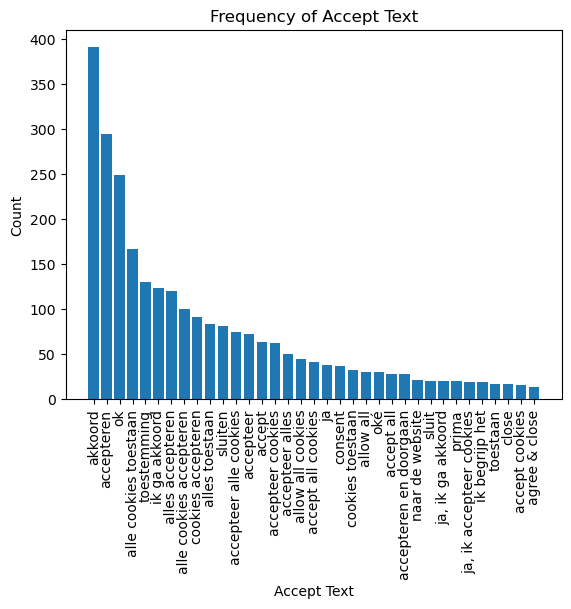

<Figure size 2000x1200 with 0 Axes>

2509


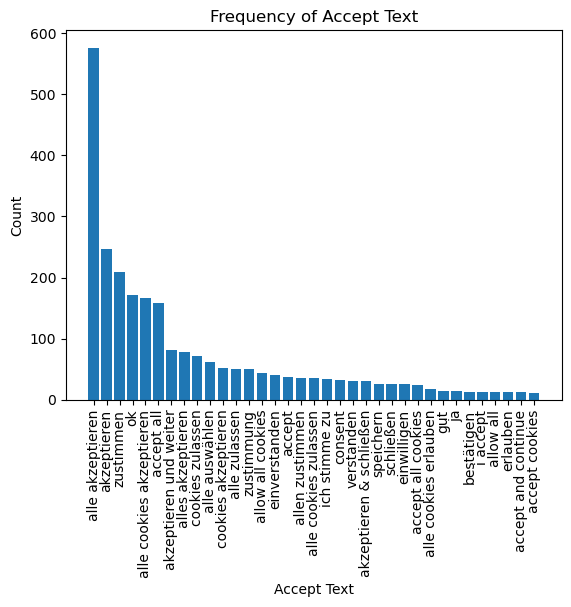

<Figure size 2000x1200 with 0 Axes>

2868


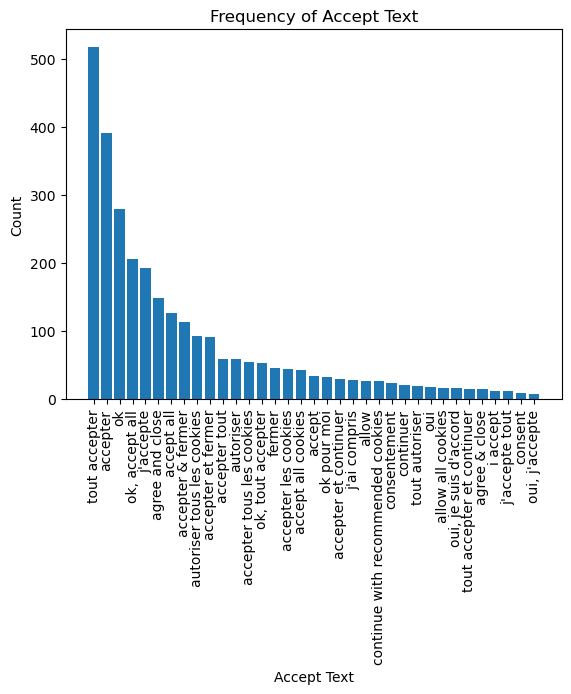

<Figure size 2000x1200 with 0 Axes>

2830


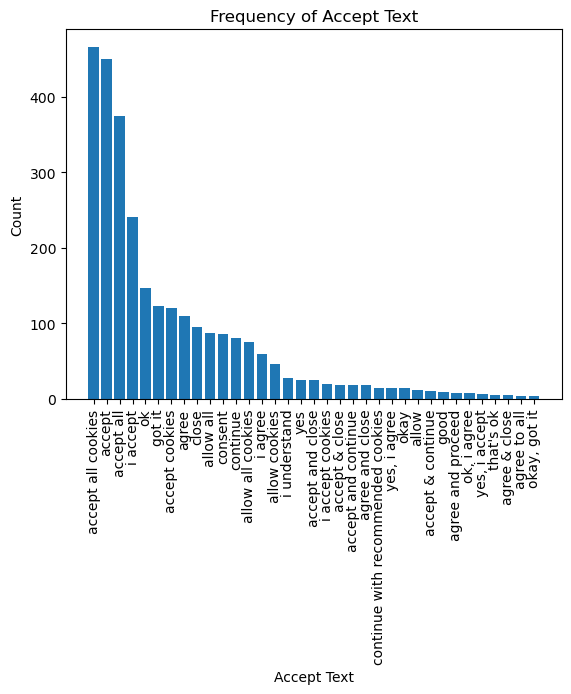

<Figure size 2000x1200 with 0 Axes>

1871


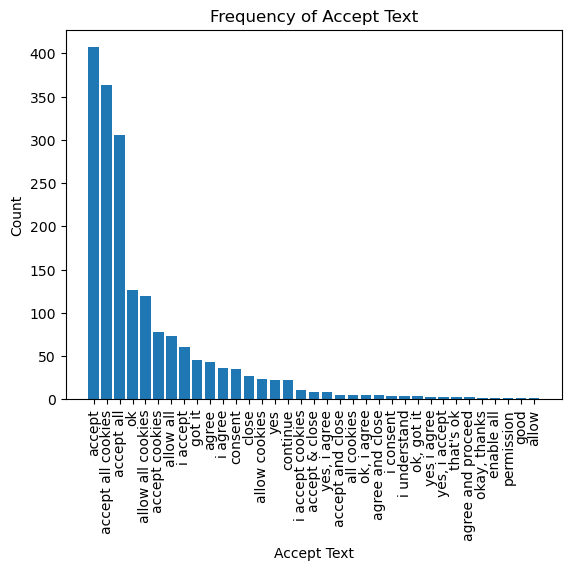

<Figure size 2000x1200 with 0 Axes>

In [5]:
for df in dffs:
    accept_text_counts = df['accept-text'].value_counts()
    top_accept_text_counts = accept_text_counts.head(35)


    # Create bar plot
    print(top_accept_text_counts.values.sum())
    plt.bar(top_accept_text_counts.index, top_accept_text_counts.values)
    plt.xlabel('Accept Text')
    plt.ylabel('Count')
    plt.title('Frequency of Accept Text Top 35')
    plt.xticks(rotation=90)  # Rotating x-axis labels for better readability if needed
    plt.figure(figsize=(20, 12))
    plt.show()

1033


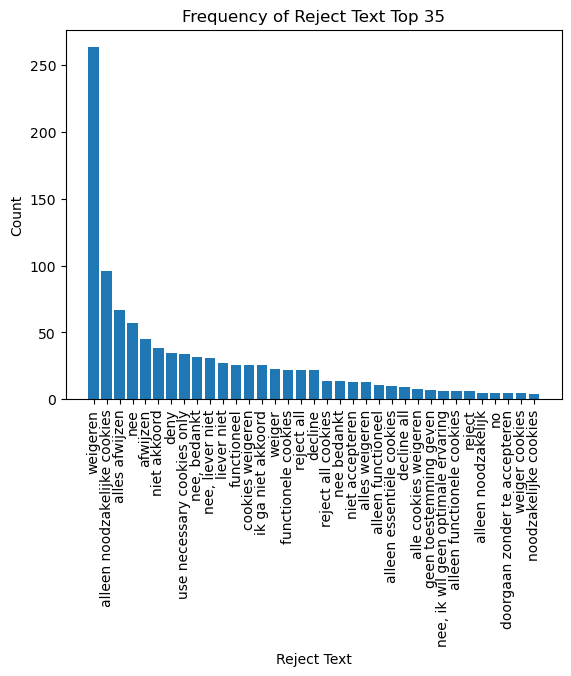

<Figure size 2000x1200 with 0 Axes>

1256


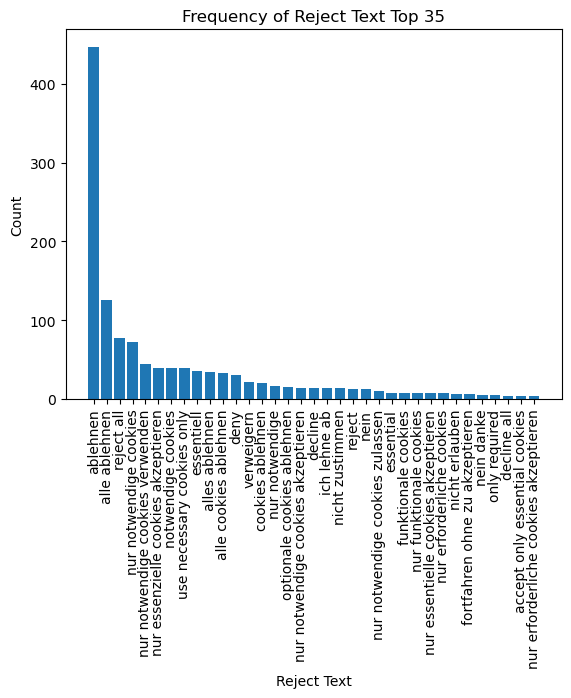

<Figure size 2000x1200 with 0 Axes>

1859


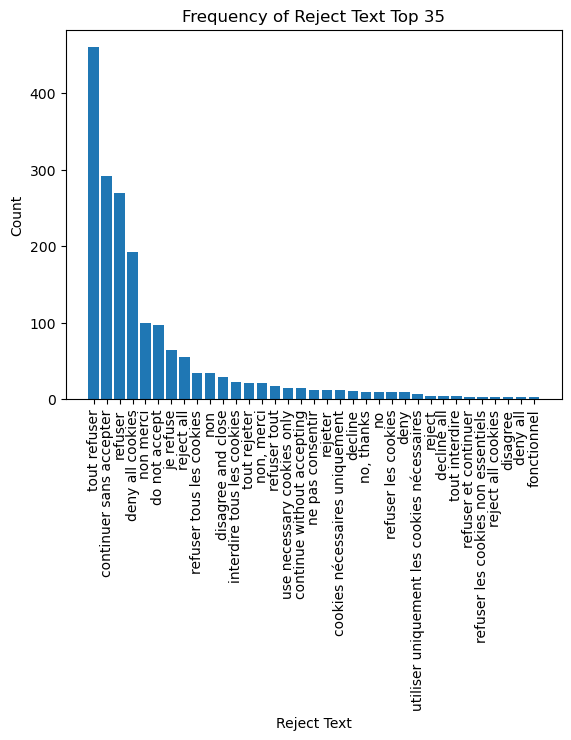

<Figure size 2000x1200 with 0 Axes>

790


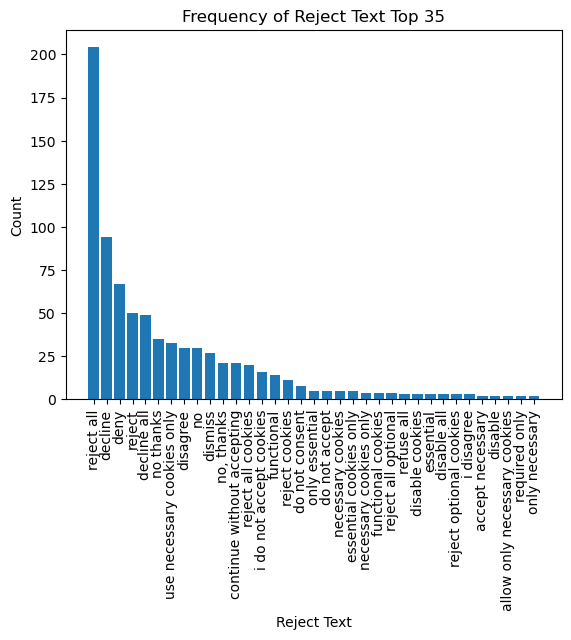

<Figure size 2000x1200 with 0 Axes>

816


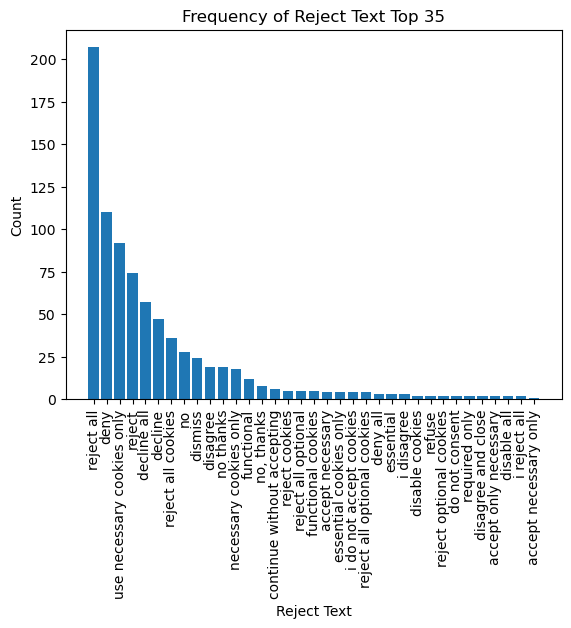

<Figure size 2000x1200 with 0 Axes>

In [8]:
for df in dffs:
    reject_text_counts = df['reject-text'].value_counts()
    top_reject_text_counts = reject_text_counts.head(35)


    # Create bar plot
    print(top_reject_text_counts.values.sum())
    plt.bar(top_reject_text_counts.index, top_reject_text_counts.values)
    plt.xlabel('Reject Text')
    plt.ylabel('Count')
    plt.title('Frequency of Reject Text Top 35')
    plt.xticks(rotation=90)  # Rotating x-axis labels for better readability if needed
    plt.figure(figsize=(20, 12))
    plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (5,) and arg 1 with shape (35,).

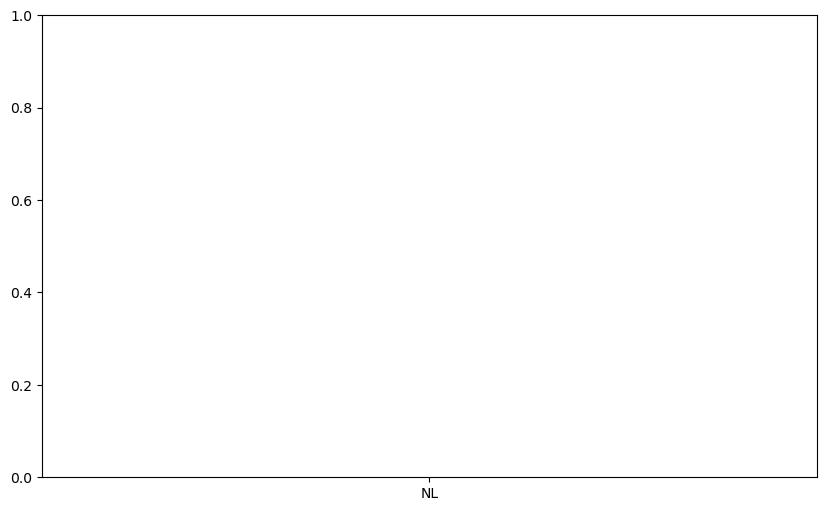

In [7]:
# List of DataFrame names and corresponding country names
countries = ['NL', 'DE', 'FR', 'GB', 'IE']  # Add corresponding country names

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Iterate over the DataFrames and countries to create individual box plots
# Create a bar plot
plt.bar(countries, top_accept_text_counts.values)
plt.xlabel('Accept Text')
plt.ylabel('Count')
plt.title('Frequency of Accept Text')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability if needed
plt.figure(figsize=(20, 12))
plt.show()